참고 사이트

https://github.com/DonghyunAnn/Gbig-Hackathon/blob/master/notebook/안동현/MCLP_Roaddata.ipynb

https://wkddmswh99.tistory.com/16

# 1. Package Import

In [197]:
# pip install yellowbrick

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [24]:
import sklearn.preprocessing
print(dir(sklearn.preprocessing))

['Binarizer', 'FunctionTransformer', 'KBinsDiscretizer', 'KernelCenterer', 'LabelBinarizer', 'LabelEncoder', 'MaxAbsScaler', 'MinMaxScaler', 'MultiLabelBinarizer', 'Normalizer', 'OneHotEncoder', 'OrdinalEncoder', 'PolynomialFeatures', 'PowerTransformer', 'QuantileTransformer', 'RobustScaler', 'SplineTransformer', 'StandardScaler', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_csr_polynomial_expansion', '_data', '_discretization', '_encoders', '_function_transformer', '_label', '_polynomial', 'add_dummy_feature', 'binarize', 'label_binarize', 'maxabs_scale', 'minmax_scale', 'normalize', 'power_transform', 'quantile_transform', 'robust_scale', 'scale']


In [28]:
print(help(LabelEncoder))

Help on class LabelEncoder in module sklearn.preprocessing._label:

class LabelEncoder(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Encode target labels with value between 0 and n_classes-1.
 |  
 |  This transformer should be used to encode target values, *i.e.* `y`, and
 |  not the input `X`.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  .. versionadded:: 0.12
 |  
 |  Attributes
 |  ----------
 |  classes_ : ndarray of shape (n_classes,)
 |      Holds the label for each class.
 |  
 |  See Also
 |  --------
 |  OrdinalEncoder : Encode categorical features using an ordinal encoding
 |      scheme.
 |  OneHotEncoder : Encode categorical features as a one-hot numeric array.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn import preprocessing
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >>

## Data Import

In [209]:
df_cost = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/구별 의료 및 인구 데이터.csv')
df_station = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울교통공사_역주소 및 전화번호_20230331.csv', encoding='cp949')
df_shop = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 관광 쇼핑.csv', encoding='cp949')
df_hospital = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 병의원 위치 정보.csv', encoding='cp949')
df_el_me = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(노인의료복지시설) 목록.csv', encoding='cp949')
df_el_house = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(노인주거복지시설) 목록.csv', encoding='cp949')
df_dis_hospital = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(장애인의료재활시설) 목록.csv', encoding='cp949')
df_dis_house = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 사회복지시설(장애인거주시설) 목록.csv', encoding='cp949')
df_med = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 약국 운영시간 정보.csv', encoding='cp949')
df_subway_people = pd.read_csv('/Users/ikjuncho/Documents/GitHub/waste_medicine_collection_bins/data/서울시 지하철호선별 역별 승하차 인원 정보(2022).csv')


# 2. preprocessing

In [210]:
# 구별 지하철 역 개수 count

df_station['지하철 구'] = df_station['도로명주소'].str.split().str[1]
df_station_count = df_station.groupby(by='지하철 구').count().iloc[:,1].to_frame()
df_station_count = df_station_count.reset_index()
df_station_count.columns = ['시군구', '지하철역 개수']
df_station_count.head()
#df_station.head()

,시군구,지하철역 개수
0,강남구,21
1,강동구,14
2,강북구,3
3,강서구,9
4,고양시,1


In [211]:
# 구별 쇼핑 구역 개수 count

df_shop_juso = df_shop[df_shop['언어'] == 'ko'][['상호명', '신주소']]
df_shop_juso['신주소'] = df_shop_juso['신주소'].str.replace('\d+', '', regex=True)
df_shop_juso['구'] = df_shop_juso['신주소'].str.split().str[1]
df_shop_count = df_shop_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_shop_count = df_shop_count.reset_index()
df_shop_count.columns = ['시군구', '쇼핑 구역 개수']
df_shop_count.head()

,시군구,쇼핑 구역 개수
0,강남구,28
1,광진구,3
2,금천구,2
3,도봉구,2
4,동대문구,4


In [212]:
# 구별 병의원 개수

df_hospital_juso = df_hospital[['기관ID', '주소']]
df_hospital_juso['구'] = df_hospital_juso['주소'].str.split().str[1].to_frame()
df_hospital_juso_count = df_hospital_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_hospital_juso_count = df_hospital_juso_count.reset_index()
df_hospital_juso_count.columns = ['시군구', '병의원 개수']
df_hospital_juso_count.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6469/1115379810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital_juso['구'] = df_hospital_juso['주소'].str.split().str[1].to_frame()


,시군구,병의원 개수
0,강남구,3069
1,강동구,912
2,강북구,488
3,강서구,966
4,관악구,744


In [213]:
# 구별 노인의료복지시설 개수 count
df_el_me_juso = df_el_me[['시설명', '시군구명']]
df_el_me_juso_count = df_el_me_juso.groupby(by='시군구명').count().reset_index()
df_el_me_juso_count.columns = ['시군구', '노인의료복지시설 개수']
df_el_me_juso_count.head()

,시군구,노인의료복지시설 개수
0,강남구,10
1,강동구,24
2,강북구,32
3,강서구,39
4,관악구,36


In [214]:
# 구별 노인주거복지시설 개수 count

df_el_house_juso = df_el_house[['시설명', '시군구명']]
df_el_house_juso_count = df_el_house_juso.groupby(by='시군구명').count().reset_index()
df_el_house_juso_count.columns = ['시군구', '노인주거복지시설 개수']
df_el_house_juso_count.head()

,시군구,노인주거복지시설 개수
0,강남구,2
1,강동구,1
2,강서구,3
3,광진구,2
4,금천구,2


In [215]:
# 구별 장애인의료재활시설

df_dis_hospital_juso = df_dis_hospital[['시설명', '시군구명']]
df_dis_hospital_juso_count = df_dis_hospital_juso.groupby(by='시군구명').count().reset_index()
df_dis_hospital_juso_count.columns = ['시군구', '장애인의료재활시설 개수']
df_dis_hospital_juso_count.head()

,시군구,장애인의료재활시설 개수
0,강동구,1
1,관악구,2
2,마포구,1
3,성동구,1
4,은평구,1


In [216]:
# 구별 장애인거주시설

df_dis_house_juso = df_dis_house[['시설명', '시군구명']]
df_dis_house_juso_count = df_dis_house_juso.groupby(by='시군구명').count().reset_index()
df_dis_house_juso_count.columns = ['시군구', '장애인거주시설 개수']
df_dis_house_juso_count.head()

,시군구,장애인거주시설 개수
0,강남구,24
1,강동구,20
2,강북구,18
3,강서구,29
4,관악구,8


In [217]:
# 구별 약국 개수

df_med_juso = df_med[['약국ID', '주소']]
df_med_juso['구'] = df_med_juso['주소'].str.split().str[1].to_frame()
df_med_juso_count = df_med_juso.groupby(by='구').count().iloc[:,1].to_frame()
df_med_juso_count = df_med_juso_count.reset_index()
df_med_juso_count.columns = ['시군구', '약국 개수']
df_med_juso_count.head()

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6469/4276189698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_juso['구'] = df_med_juso['주소'].str.split().str[1].to_frame()


,시군구,약국 개수
0,강남구,525
1,강동구,260
2,강북구,176
3,강서구,289
4,관악구,234


In [218]:
# 2022년 역별 승하차 인원 정보

df_station_juso = df_station[['역명', '지하철 구']]

df_subway_people.head(10)
df_subway_people['역 이용 총 승객 수'] = df_subway_people['승차총승객수'] + df_subway_people['하차총승객수']
df_subway_people = df_subway_people[['역명', '역 이용 총 승객 수']]

merged_subway_df = pd.merge(df_station_juso, df_subway_people, on='역명')

merged_subway_df_count = merged_subway_df.groupby(by='지하철 구')['역 이용 총 승객 수'].sum().reset_index()
merged_subway_df_count.columns = ['시군구', '구별 지하철 총 승객 수']
merged_subway_df_count.head()

,시군구,구별 지하철 총 승객 수
0,강남구,350427151
1,강동구,123564526
2,강북구,32071161
3,강서구,96283191
4,고양시,3319770


In [219]:
df_cost.columns = ['시군구', '총 의료비용', '총 거주인구']

In [222]:
# 모든 데이터 프레임 결합

merged_df = pd.merge(df_station_count, df_shop_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_hospital_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_me_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_el_house_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_hospital_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_dis_house_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_med_juso_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, merged_subway_df_count, on='시군구', how='left')
merged_df = pd.merge(merged_df, df_cost, on='시군구', how='left')

merged_df = merged_df[~merged_df['시군구'].str.endswith('시')].reset_index(drop=True)

merged_df

,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,구별 지하철 총 승객 수,총 의료비용,총 거주인구
0,강남구,21,28.0,3069.0,10.0,2.0,NaN,24.0,525.0,350427151,1.600232e+12,529962.0
1,강동구,14,NaN,912.0,24.0,1.0,1.0,20.0,260.0,123564526,3.049124e+11,460280.0
2,강북구,3,NaN,488.0,32.0,NaN,NaN,18.0,176.0,32071161,1.347530e+11,293119.0
3,강서구,9,NaN,966.0,39.0,3.0,NaN,29.0,289.0,96283191,3.677270e+11,568666.0
4,관악구,4,NaN,744.0,36.0,NaN,2.0,8.0,234.0,103761344,1.923314e+11,487430.0
5,광진구,11,3.0,593.0,20.0,2.0,NaN,1.0,179.0,179447316,2.455229e+11,337071.0
6,구로구,7,NaN,602.0,17.0,NaN,NaN,9.0,193.0,121861394,2.355667e+11,395422.0
7,금천구,1,2.0,383.0,25.0,2.0,NaN,8.0,135.0,37408464,2.630039e+11,229395.0
8,노원구,13,NaN,792.0,30.0,2.0,NaN,21.0,237.0,156627591,2.824783e+11,502820.0
9,도봉구,3,2.0,391.0,54.0,2.0,NaN,12.0,125.0,46897099,1.084817e+11,310853.0


In [231]:
final_df = merged_df.fillna(0)
final_df.iloc[:, 1:-3] = final_df.iloc[:, 1:-3].astype(int)
final_df.iloc[:, -1] = final_df.iloc[:, -1].astype(int)
final_df

/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6469/356818399.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.iloc[:, 1:-3] = final_df.iloc[:, 1:-3].astype(int)
/var/folders/pf/3nx9qgs16f73_h0z28r_08780000gn/T/ipykernel_6469/356818399.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df.iloc[:, -1] = final_df.iloc[:, -1].astype(int)


,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,구별 지하철 총 승객 수,총 의료비용,총 거주인구
0,강남구,21,28,3069,10,2,0,24,525,350427151,1.600232e+12,529962
1,강동구,14,0,912,24,1,1,20,260,123564526,3.049124e+11,460280
2,강북구,3,0,488,32,0,0,18,176,32071161,1.347530e+11,293119
3,강서구,9,0,966,39,3,0,29,289,96283191,3.677270e+11,568666
4,관악구,4,0,744,36,0,2,8,234,103761344,1.923314e+11,487430
5,광진구,11,3,593,20,2,0,1,179,179447316,2.455229e+11,337071
6,구로구,7,0,602,17,0,0,9,193,121861394,2.355667e+11,395422
7,금천구,1,2,383,25,2,0,8,135,37408464,2.630039e+11,229395
8,노원구,13,0,792,30,2,0,21,237,156627591,2.824783e+11,502820
9,도봉구,3,2,391,54,2,0,12,125,46897099,1.084817e+11,310853


# 2. PCA

## (1) Scaling

In [232]:
numeric_cols = final_df.iloc[:,1:]
numeric_cols

,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,구별 지하철 총 승객 수,총 의료비용,총 거주인구
0,21,28,3069,10,2,0,24,525,350427151,1.600232e+12,529962
1,14,0,912,24,1,1,20,260,123564526,3.049124e+11,460280
2,3,0,488,32,0,0,18,176,32071161,1.347530e+11,293119
3,9,0,966,39,3,0,29,289,96283191,3.677270e+11,568666
4,4,0,744,36,0,2,8,234,103761344,1.923314e+11,487430
5,11,3,593,20,2,0,1,179,179447316,2.455229e+11,337071
6,7,0,602,17,0,0,9,193,121861394,2.355667e+11,395422
7,1,2,383,25,2,0,8,135,37408464,2.630039e+11,229395
8,13,0,792,30,2,0,21,237,156627591,2.824783e+11,502820
9,3,2,391,54,2,0,12,125,46897099,1.084817e+11,310853


In [233]:
# '시군구' 열을 제외한 수치형 데이터 선택
numeric_cols = final_df.iloc[:,1:]

# 데이터 표준화
scaler = StandardScaler()
scaler.fit(numeric_cols)
df_scaled = scaler.transform(numeric_cols)
df_scaled

array([[ 1.5860039 ,  2.63986579,  4.2740679 , -0.88041701,  1.13581527,
        -0.46852129,  1.79168129,  3.52017186,  2.20310808,  4.35062715,
         1.22788668],
       [ 0.4846123 , -0.68969467,  0.23595886,  0.18953422,  0.0436852 ,
         1.48365074,  1.26779787,  0.42266375, -0.21200594, -0.06917854,
         0.66814353],
       [-1.24614592, -0.68969467, -0.55780944,  0.80093492, -1.04844487,
        -0.46852129,  1.00585616, -0.55918788, -1.18601789, -0.64978562,
        -0.67463116],
       [-0.30209598, -0.68969467,  0.33705199,  1.33591053,  2.22794534,
        -0.46852129,  2.44653557,  0.76163633, -0.50243515,  0.14515319,
         1.53878906],
       [-1.08880427, -0.68969467, -0.07855311,  1.10663526, -1.04844487,
         3.43582276, -0.30385238,  0.11875729, -0.4228249 , -0.45332027,
         0.88623467],
       [ 0.01258733, -0.33295605, -0.36123946, -0.11616613,  1.13581527,
        -0.46852129, -1.22064837, -0.52412175,  0.38290611, -0.2718238 ,
        -0.321

In [234]:
# '시군구' 열을 추출
sigungu_col = merged_df['시군구']

# 표준화된 데이터를 데이터프레임으로 변환
df_scaled = pd.DataFrame(data=df_scaled, columns=numeric_cols.columns)

# '시군구' 열과 표준화된 데이터프레임을 병합
merged_df_scaled = pd.concat([sigungu_col, df_scaled], axis=1)

In [235]:
merged_df_scaled.head()

,시군구,지하철역 개수,쇼핑 구역 개수,병의원 개수,노인의료복지시설 개수,노인주거복지시설 개수,장애인의료재활시설 개수,장애인거주시설 개수,약국 개수,구별 지하철 총 승객 수,총 의료비용,총 거주인구
0,강남구,1.586004,2.639866,4.274068,-0.880417,1.135815,-0.468521,1.791681,3.520172,2.203108,4.350627,1.227887
1,강동구,0.484612,-0.689695,0.235959,0.189534,0.043685,1.483651,1.267798,0.422664,-0.212006,-0.069179,0.668144
2,강북구,-1.246146,-0.689695,-0.557809,0.800935,-1.048445,-0.468521,1.005856,-0.559188,-1.186018,-0.649786,-0.674631
3,강서구,-0.302096,-0.689695,0.337052,1.335911,2.227945,-0.468521,2.446536,0.761636,-0.502435,0.145153,1.538789
4,관악구,-1.088804,-0.689695,-0.078553,1.106635,-1.048445,3.435823,-0.303852,0.118757,-0.422825,-0.453320,0.886235


## (2) PCA

In [236]:
x = merged_df_scaled.drop(['시군구'], axis=1).values # 독립변인들의 value값만 추출
y = merged_df_scaled['시군구'].values # 종속변인 추출

In [237]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

print('누적 설명 분산량: ', sum(pca.explained_variance_ratio_))

누적 설명 분산량:  0.6692228085706389


In [238]:
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', 'principal component3'])
# 주성분으로 이루어진 데이터 프레임 구성

print('누적 설명 분산량: ', sum(pca.explained_variance_ratio_))

누적 설명 분산량:  0.7857956572443096


In [239]:
pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', 'principal component3', 'principal component4'])
# 주성분으로 이루어진 데이터 프레임 구성

print('누적 설명 분산량: ', sum(pca.explained_variance_ratio_))

누적 설명 분산량:  0.8722603922093186


# 3. Clustering

In [240]:
principalDf

,principal component1,principal component2,principal component3,principal component4
0,8.110150,-0.519263,-0.857474,-0.954792
1,0.508764,-1.456118,0.974832,1.138879
2,-1.955134,-0.975204,-0.192876,-0.869508
3,0.925929,-3.235529,-1.995875,1.008887
4,-1.195459,-1.643380,2.762437,1.408263
5,-0.622411,0.824394,-0.852773,0.364713
6,-0.969408,-0.065827,0.568913,-0.974813
7,-2.173079,0.086223,-1.629151,-0.012505
8,0.538189,-1.658121,-0.984110,0.679609
9,-2.402328,-1.344298,-1.948161,0.505628


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

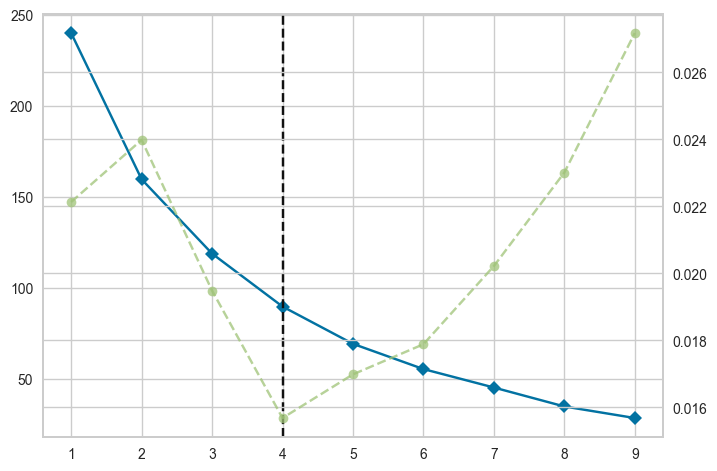

In [241]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(principalDf)

In [242]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(principalDf)
kmeans.labels_

array([3, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1], dtype=int32)

In [243]:
cluster_labels = kmeans.labels_
principalDf_with_labels = pd.concat([principalDf, pd.Series(cluster_labels, name='cluster_label')], axis=1)
fin_df = pd.concat([principalDf_with_labels, pd.Series(y, name='시군구')], axis=1)
fin_df

,principal component1,principal component2,principal component3,principal component4,cluster_label,시군구
0,8.110150,-0.519263,-0.857474,-0.954792,3,강남구
1,0.508764,-1.456118,0.974832,1.138879,0,강동구
2,-1.955134,-0.975204,-0.192876,-0.869508,1,강북구
3,0.925929,-3.235529,-1.995875,1.008887,2,강서구
4,-1.195459,-1.643380,2.762437,1.408263,0,관악구
5,-0.622411,0.824394,-0.852773,0.364713,1,광진구
6,-0.969408,-0.065827,0.568913,-0.974813,1,구로구
7,-2.173079,0.086223,-1.629151,-0.012505,1,금천구
8,0.538189,-1.658121,-0.984110,0.679609,2,노원구
9,-2.402328,-1.344298,-1.948161,0.505628,1,도봉구


/Users/ikjuncho/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikjuncho/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikjuncho/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikjuncho/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ikjuncho/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) mis

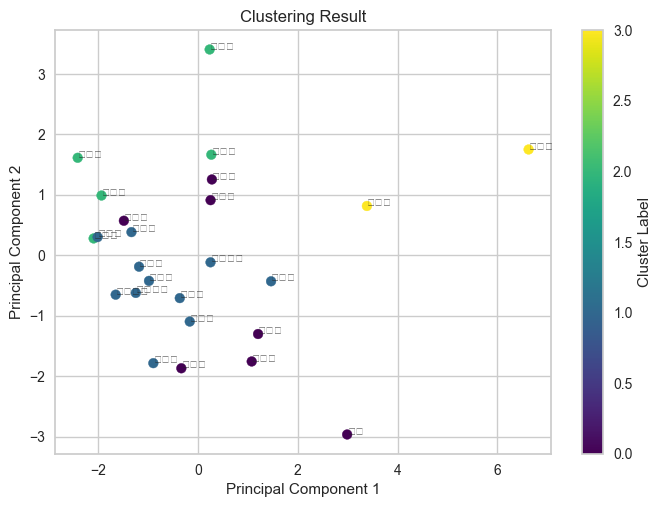

In [204]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(fin_df['principal component1'], fin_df['principal component2'], c=fin_df['cluster_label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Result')

# 시군구 이름 표시
for i, txt in enumerate(fin_df['시군구']):
    plt.annotate(txt, (fin_df['principal component1'][i], fin_df['principal component2'][i]), fontsize=8)

plt.colorbar(label='Cluster Label')
plt.show()


## (1) preprocessing

In [9]:
processed_df_cost = df_cost.copy()

In [10]:
processed_df_cost.head()

,sgg,total_amt_corr,tot_popltn_co
0,강남구,1600231796936,529962
1,강동구,304912421021,460280
2,강북구,134752996931,293119
3,강서구,367726959119,568666
4,관악구,192331403810,487430


In [30]:
le = LabelEncoder()
le.fit(processed_df_cost['sgg'])

LabelEncoder()

In [31]:
le.classes_

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [32]:
le.transform(processed_df_cost['sgg'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [33]:
label_processed_df_cost = processed_df_cost.copy()
label_processed_df_cost['sgg'] = le.transform(processed_df_cost['sgg'])
label_processed_df_cost.head()

,sgg,total_amt_corr,tot_popltn_co
0,0,1600231796936,529962
1,1,304912421021,460280
2,2,134752996931,293119
3,3,367726959119,568666
4,4,192331403810,487430


In [39]:
scaler = StandardScaler()
label_processed_df_cost[['total_amt_corr', 'tot_popltn_co']] = scaler.fit_transform(label_processed_df_cost[['total_amt_corr','tot_popltn_co']])

In [40]:
label_processed_df_cost

,sgg,total_amt_corr,tot_popltn_co
0,0,4.350627,1.227887
1,1,-0.069179,0.668144
2,2,-0.649786,-0.674631
3,3,0.145153,1.538789
4,4,-0.453320,0.886235
5,5,-0.271824,-0.321573
6,6,-0.305795,0.147151
7,7,-0.212176,-1.186515
8,8,-0.145727,1.009860
9,9,-0.739427,-0.532177


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

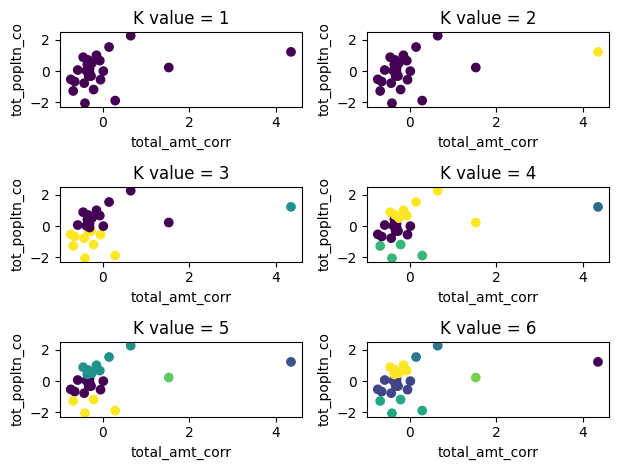

In [43]:
# K 값을 늘려가며 반복 테스트
for i in range(1, 7):
       # 클러스터 생성
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(label_processed_df_cost[['total_amt_corr', 'tot_popltn_co']])
    # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
    plt.subplot(3, 2, i)
    plt.tight_layout()
    # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('total_amt_corr')
    plt.ylabel('tot_popltn_co')
    # 클러스터링 그리기
    plt.scatter(label_processed_df_cost['total_amt_corr'], label_processed_df_cost['tot_popltn_co'], c=ids)  
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [4]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [6]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])